Assignment 6:

Name:

UID:

Please submit to ELMS
- a PDF containing all outputs (by executing **Run all**)
- your ipynb notebook containing all the code

I understand the policy on academic integrity (collaboration and the use of online material).
Please sign your name here:

In [ ]:
# import the necessary packages
import numpy as np
import gzip, os
from urllib.request import urlretrieve
from random import random
from math import exp
from random import seed
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Background
In this project, you will use PyTorch to train neural networks for the tasks of image classification and image segemntation.

If you are not familiar with PyTorch, this [tutorial](https://pytorch.org/tutorials/beginner/introyt/trainingyt.html) guides you through how you write a training loop to train a PyTorch model.
You can basically follow the tutorial to do Part 1, and you can use the classifier model in the tutorial as a reference to build the model we describe.

The overall pipeline for training a model in PyTorch is:
- load the data
- build a model
- setup an optimizer for the model parameters
- choose a criterion (loss function)
- write a training loop that optimizers the model parameters w/ gradient descent (through the pytorch optimizer)

The main differences between part 1 and 2 would be:
- The labels (image classes *vs*. per pixel class)
- The model (in part 1, you predict a class *per image*, while in part 2 you need to predict class *per pixel*)
- The loss function

**Note: Colab allows you to use GPU, so make sure to use that to speed up training**
You can simply move everything to the GPU in PyTorch by calling `cuda()` on your model and parameters like this:

```
model = model.cuda()
data_x = data_x.cuda()
labels = labels.cuda()

```




# Part 1: Training an Image Classifier




##Overview
CIFAR10 dataset will be used to train an image classifier.

![](https://miro.medium.com/max/578/1*BCsHErqOJxmKDLQXYJR_ow.png)



##Data
Using `torchvision`, it’s extremely easy to load `CIFAR10`.

In [ ]:
## The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

images min=-1.0 max=1.0


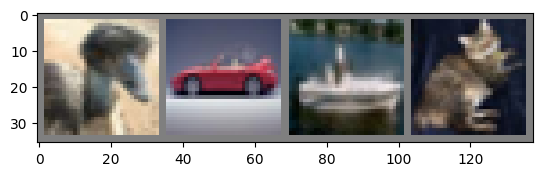

bird  car   ship  cat  


In [ ]:
## Let's show some of the training images, for fun :)

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
print(f"images min={images.min()} max={images.max()}")
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

##Code (20 pts)

###Define a Convolutional Neural Network (10 pt)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        """
          Add layers to your neural net.
          Tutorial for reference: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html
        """
        # YOUR CODE HERE

    def forward(self, x):
        """
          Forward pass:
            Apply layers you defined in __init__() to RGB input
            layers: Conv2d --> ReLU --> MaxPool2d --> Conv2d --> ReLU --> MaxPool2d --> Flatten --> Linear --> ReLU --> Linear --> ReLU --> Linear
        """
        # YOUR CODE HERE

        return None

net = Net()

###Define a Loss function and optimizer (5 pt)

Let’s use a Classification Cross-Entropy loss and SGD with momentum. (Feel free to experiment with other loss functions and optimizers to observe differences)

In [ ]:
criterion = ??? # YOUR CODE HERE: Add loss function
optimizer = ??? # YOUR CODE HERE: Add optimizer

###Train the network (5 pts)

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [ ]:
epochs = ??? # YOUR CODE HERE: Define number of epochs to train

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        """
          Below, please add code to perform the following:
          1. Move inputs and labels to the GPU
          2. Zero parameter gradients
          3. Pass input into model (forward pass)
          4. Calculate loss
          5. Perform backpropagation (backward pass)
        """
        # YOUR CODE HERE

        # Optimize / update parameters
        optimizer.step()

        # Print stats
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

## Let’s quickly save our trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

###Test your network on the test data
We have trained the network over the training dataset. But we need to check if the network has learned anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# no gradients needed during test phase
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

## Write-up (5 pt)

*   Plot loss over epochs
*   Plot accuracy over epochs

In [ ]:
# YOUR CODE HERE

## Extra Credits (5 pt)
Run VGG with pre-trained weights in this [colab](https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_vgg.ipynb#scrollTo=daily-wayne). Test any two images of your choice to your model and to VGG model and show accuracy (images must include objects from CIFAR10 classes). Discuss which model performs better and why.

In [ ]:
# YOUR CODE HERE

# Part 2: Semantic Segmentation

## Overview
**Semantic Segmentation** is an image analysis task in which we **classify** ***each pixel*** in the image into a class.

Let's say we have the following image:

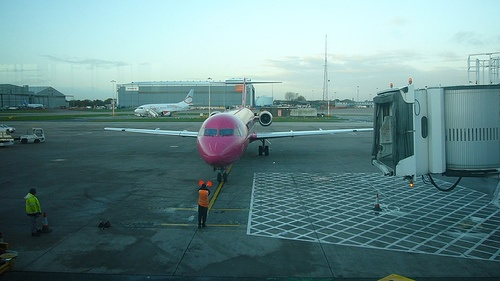

Given the above image its semantically segmented image would be the following:

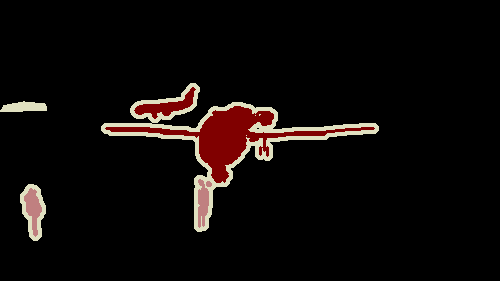

As you can see, ***each pixel*** in the image is classified to its respective class.


## Resources
* **Refer to original paper FCNet for implementation details**: https://arxiv.org/abs/1411.4038
* Figures of FCNet Structure: https://towardsdatascience.com/review-fcn-semantic-segmentation-eb8c9b50d2d1
* PyTorch tutorial for image segmentation: https://towardsdatascience.com/train-neural-net-for-semantic-segmentation-with-pytorch-in-50-lines-of-code-830c71a6544f

## Data

WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.

In [ ]:
import os
import tarfile
import shutil
import urllib.request

url='http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar'
path='VOC'
def get_archive(path,url):
  try:
    os.mkdir(path)
  except:
    path=path

  filename='devkit'
  urllib.request.urlretrieve(url,f"{path}/{filename}.tar")

get_archive(path,url)
def extract(path):
  tar_file=tarfile.open(f"{path}/devkit.tar")
  tar_file.extractall('./')
  tar_file.close()
  shutil.rmtree(path)

extract(path)

## Helper Functions

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models
import torchvision.transforms as T
import numpy as np

"""Various RGB palettes for coloring segmentation labels."""

# Color channels in the segmentation maps in the dataset
VOC_COLORMAP = [
    [0, 0, 0],
    [224, 224, 192],
    [128, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 192, 0],
    [0, 64, 128],
]

# Categories that correspond to each color above
VOC_CLASSES = [
    "background",
    "edge",
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "potted plant",
    "sheep",
    "sofa",
    "train",
    "tv/monitor",
]

## Code (25 pt)

### 1. Implement dataset class for training and validation (5 pt)

In [ ]:
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class VocDataset(Dataset):
  def __init__(self, dir, color_map):
    self.root = os.path.join(dir,'VOCdevkit/VOC2007')
    self.images_dir = os.path.join(self.root,'JPEGImages')
    self.target_dir = os.path.join(self.root,'SegmentationClass') # ground truth?
    file_list = os.path.join(self.root,'ImageSets/Segmentation/trainval.txt')
    self.files = [line.rstrip() for line in open(file_list, "r")]
    self.color_map = color_map

  def colors_to_seg_map(self, seg_RGB):
    """
      Convert [R, G, B] color channels of RGB segmentation maps (from dataset)
      to binary segmentation map of shape (n_classes, H, W), where n_classes
      is the number of distinct classes/colors present in  RGB segmentation map.

      The diagram below may provide more insight on how seg_map should be structured.
    """
    # YOUR CODE HERE

    return seg_map

  def __getitem__(self, index):
    """
      1. Read in RGB image and RGB segmentation map.
      2. Convert RGB segmentation map to binary segmentation map of shape (n_classes, H, W)
    """
    # YOUR CODE HERE

    return image, seg_map

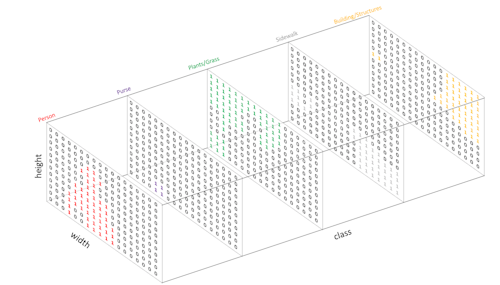

###2. Define model and training loop (15 pt)

#### Build the FCN-32 model

In [ ]:
class FCN32(torch.nn.Module):
  def __init__(self, n_classes):
    super().__init__()

    # Pretrained VGG-16 features (first half of NN)
    vgg16 = models.vgg16(weights='VGG16_Weights.DEFAULT')
    features = list(vgg16.features.children())
    self.vgg_features = nn.Sequential(*features)
    self.n_class = n_classes

    """
      Perform upsampling via deconvolution operations
    """
    # YOUR CODE HERE

  def forward(self, x):
    """
      Similar to what you did in Part 1, apply layers you defined in __init__()
      to RGB input to perform the forward pass.
    """
    # YOUR CODE HERE
    return None

#### Training loop for the semantic segmentation model

Hint: you will need to *center crop* the input data into size 224x224 before passing into your model. Check out [`torchvision.transforms.Compose()`](https://pytorch.org/vision/main/generated/torchvision.transforms.Compose.html).

In [ ]:
import torch.optim as optim

criterion = ??? # YOUR CODE HERE: Add loss function (pixel-wise loss)
optimizer = ??? # YOUR CODE HERE: Add optimizer

epochs = 5
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    """
      Implement the training loop (similar to what you've done in Part 1)
    """
    # YOUR CODE HERE


### 3. Inference for semantic segmentation (5 pt)

Perform inference by running your trained model on the testing data.

*   Display the results of your FCN-32 model
      *   Visualize 1) the input image and 2) the output segmentation map
*   Report mean IoU as the evaluation metric

In [ ]:
# YOUR CODE HERE